In [13]:
"""
    Choose the number of principal components by looking at the cumulative variance 
    of the decomposed spectral data, even though we will be generally using the 
    first derivative data for more accurate classification.
    
    Task: Find the most important/correlative components out of 
          the 100 which are needed to make up the vectors.
          - Take the top 10 and bottom 10
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [46]:
#filepath = '100_dim_pca_word2vec_wiki_attributes.csv'
#filepath = '100_dim_pca_fasttext_wiki_attributes.csv'

#filepath = '100_dim_pca_word2vec_giga_attributes.csv'
#filepath = '100_dim_pca_fasttext_giga_attributes.csv'

#filepath = '100_dim_pca_word2vec_ukwac_attributes.csv'
filepath = '100_dim_pca_fasttext_ukwac_attributes.csv'

data = np.genfromtxt(filepath, delimiter=',', dtype='float64')
data

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [-0.035383, -0.47609 ,  0.18857 , ...,  0.016487,  0.15428 ,
        -0.28378 ],
       [-0.028068, -0.47123 ,  0.24489 , ..., -0.20574 ,  0.28785 ,
         0.20679 ],
       ...,
       [-0.07877 ,  0.10549 ,  0.63327 , ...,  0.061606,  0.16927 ,
        -0.14046 ],
       [ 0.21258 , -0.87293 ,  0.28657 , ..., -0.012279,  0.48261 ,
        -0.21656 ],
       [-0.053946, -0.72989 ,  0.5742  , ...,  0.097284,  0.1476  ,
        -0.24239 ]])

In [84]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data[1:, 0:100])
data_rescaled

array([[0.50940592, 0.5893748 , 0.24736927, ..., 0.42217708, 0.47604299,
        0.55524517],
       [0.51487222, 0.59278959, 0.28852562, ..., 0.26992196, 0.56443906,
        0.85842923],
       [0.72735017, 0.21964278, 0.38345854, ..., 0.38438718, 0.66413861,
        0.28579286],
       ...,
       [0.47698401, 0.99801155, 0.57233784, ..., 0.45308961, 0.48596331,
        0.64382038],
       [0.69470184, 0.31054229, 0.31898366, ..., 0.40246854, 0.69333042,
        0.59678875],
       [0.4955343 , 0.41104678, 0.5291719 , ..., 0.47753379, 0.47162219,
        0.58082519]])

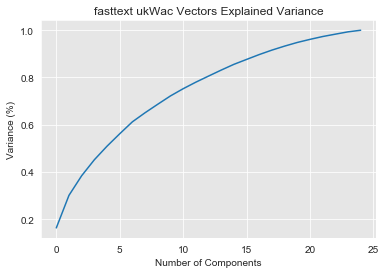

In [82]:
#Fitting the PCA algorithm with our Data
import seaborn as sns

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

pca = PCA().fit(data_rescaled)#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('fasttext ukWac Vectors Explained Variance')
plt.show()

In [76]:
pca = PCA(n_components=25)
dataset = pca.fit_transform(data_rescaled)

In [77]:
dataset

array([[-0.0971512 ,  0.89533697, -0.00743321, ..., -0.09017777,
         0.32563645, -0.15672362],
       [ 0.08013639, -0.88340427, -0.82797748, ...,  0.00808344,
         0.0654865 , -0.05379535],
       [ 0.20443808,  1.01436048,  0.28948971, ..., -0.0053092 ,
        -0.05996682,  0.2176824 ],
       ...,
       [ 1.65938017, -0.59178558,  0.18149004, ..., -0.01399059,
        -0.03503102, -0.06537589],
       [-0.93609633, -0.54361323,  0.34614552, ...,  0.18415675,
         0.2666105 , -0.07271987],
       [-0.45266646,  0.37644227, -0.23194853, ..., -0.23199992,
         0.04535188,  0.05923796]])

In [78]:
data_mean = np.mean(data_rescaled)
data_center = data_rescaled - data_mean
cov_matrix = np.cov(data_center)

print('Data mean:', str(data_mean) + '\n')
print('Data center:', str(data_center) + '\n')
print('Covariance matrix:', str(cov_matrix) + '\n')

Data mean: 0.4952972219612363

Data center: [[ 1.41086964e-02  9.40775760e-02 -2.47927955e-01 ... -7.31201424e-02
  -1.92542317e-02  5.99479482e-02]
 [ 1.95749944e-02  9.74923678e-02 -2.06771602e-01 ... -2.25375259e-01
   6.91418399e-02  3.63132008e-01]
 [ 2.32052950e-01 -2.75654440e-01 -1.11838685e-01 ... -1.10910039e-01
   1.68841385e-01 -2.09504359e-01]
 ...
 [-1.83132136e-02  5.02714329e-01  7.70406226e-02 ... -4.22076134e-02
  -9.33391192e-03  1.48523156e-01]
 [ 1.99404616e-01 -1.84754931e-01 -1.76313562e-01 ... -9.28286867e-02
   1.98033199e-01  1.01491525e-01]
 [ 2.37077844e-04 -8.42504407e-02  3.38746818e-02 ... -1.77634278e-02
  -2.36750280e-02  8.55279638e-02]]

Covariance matrix: [[ 0.03029957 -0.00217541  0.0060737  ... -0.00430149  0.00512864
   0.00769481]
 [-0.00217541  0.03512629 -0.00980753 ...  0.01221018  0.00640756
   0.00251387]
 [ 0.0060737  -0.00980753  0.03491503 ... -0.00565627 -0.0008681
   0.00083412]
 ...
 [-0.00430149  0.01221018 -0.00565627 ...  0.05417523

In [79]:
eigenval, eigenvec = np.linalg.eig(cov_matrix)
eigenval, eigenvec

(array([ 1.09470012e+00+0.00000000e+00j,  6.46927235e-01+0.00000000e+00j,
         5.78769041e-01+0.00000000e+00j,  4.21175089e-01+0.00000000e+00j,
         3.71243573e-01+0.00000000e+00j,  2.61779470e-01+0.00000000e+00j,
         2.47151464e-01+0.00000000e+00j,  2.13532811e-01+0.00000000e+00j,
         2.05276255e-01+0.00000000e+00j,  1.60274380e-01+0.00000000e+00j,
         1.37563449e-01+0.00000000e+00j,  1.26420199e-01+0.00000000e+00j,
         1.18334457e-01+0.00000000e+00j,  1.15165654e-01+0.00000000e+00j,
         1.09161167e-01+0.00000000e+00j,  9.95955988e-02+0.00000000e+00j,
         9.35772666e-02+0.00000000e+00j,  9.42810520e-02+0.00000000e+00j,
         8.81324998e-02+0.00000000e+00j,  8.31222203e-02+0.00000000e+00j,
         7.80938266e-02+0.00000000e+00j,  7.65841627e-02+0.00000000e+00j,
         7.30955728e-02+0.00000000e+00j,  6.75496914e-02+0.00000000e+00j,
         6.80943503e-02+0.00000000e+00j,  6.22134096e-02+0.00000000e+00j,
         5.92104115e-02+0.00000000e+00

C:\Users\Chelsea\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


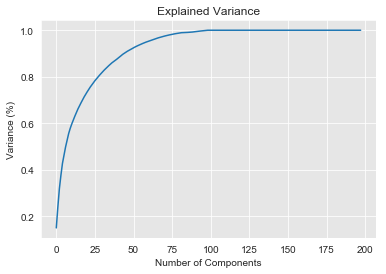

In [80]:
significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]#Plotting the Cumulative Summation of the Explained Variance

plt.figure()
plt.plot(np.cumsum(significance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()